# ¡Hola Luz! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


----

<div class="alert alert-block alert-danger">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Luz, hiciste un buen inicio en el análisis exploratorio de los datos, empleando herramientas adecuadas para entender su estructura y asegurarte de que estén listos para el análisis. También mostraste una buena organización al agrupar la información. 

Sin embargo, es importante que ajustes el cálculo del consumo de llamadas e internet aplicando los redondeos como lo indica el enunciado, ya que esto impacta directamente en la estimación de ingresos. Además, el análisis del comportamiento de los usuarios debe extenderse a todos los conjuntos de datos con la misma profundidad que empleaste para la información de llamadas, y en las pruebas de hipótesis es clave utilizar las columnas correctas al aplicar filtros, para que las comparaciones y conclusiones reflejen con precisión el comportamiento de los usuarios. 

Tienes una base sólida, solo necesitas pulir algunos detalles para que tu análisis esté completo y bien alineado con los objetivos del proyecto. No te desanimes, con estos ajustes tu trabajo quedará mucho más claro y robusto.

Estaré atento a tu próxima iteración 👀

*Estado del Proyecto:* **No Aprobado**

</div>

-----

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [ ]:
# Cargar todas las librerías
import pandas as pd #trabajar con tablas de datos
import numpy as np #operaciones matematicas y numericas
from matplotlib import pyplot as plt #generar visualizaciones (graficos)
import scipy.stats as st #pruebas de hipotesis
from datetime import datetime

## Cargar datos

In [ ]:
# Carga los archivos de datos en diferentes DataFrames
df_users=pd.read_csv('/datasets/megaline_users.csv', sep=",")
df_calls=pd.read_csv('/datasets/megaline_calls.csv',  sep=",")
df_messages=pd.read_csv('/datasets/megaline_messages.csv',  sep=",")
df_internet=pd.read_csv('/datasets/megaline_internet.csv',  sep=",")
df_plans=pd.read_csv('/datasets/megaline_plans.csv',  sep=",")


## Preparar los datos

## Tarifas

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()

In [ ]:
# Imprime una muestra de los datos para las tarifas
df_plans.head()


El DataFrame solo muestra dos filas y 8 columnas donde esta el detalle de lo que contiene cada plan, no se observa datos ausente o duplicados, sin embargo en la columna 2 que corresponde a mb_per_month_included presenta el valor por megabytes que en el caso de consumo de datos debe corresponder a gigabytes ya que asi es el manejo en el mercado para el caso de los celulares por lo cual se debe adicionar una nueva columna con gigabytes, adicionalmente podriamos adicionar por plan el valor de los costos de minutos, mensajes y gigas que costarian fuera de los planes para poder comparar el ahorro aproximado que se tiene por plan y valor total ahorrado.

## Corregir datos

In [ ]:
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024
df_plans.head()

## Enriquecer los datos

In [ ]:
#Costo por gigabytes fuera del plan por la cantidad que esta incluido en el plan
df_plans['costo_gigas'] = df_plans['gb_per_month_included'] * (df_plans['usd_per_gb'])
#Costo por minuto fuera del plan por la cantidad que esta incluido en el plan
df_plans['costo_minuto'] = df_plans['minutes_included'] * df_plans['usd_per_minute']
#Costo por mensaje fuera del plan por la cantidad que esta incluido en el plan
df_plans['costo_mensaje'] = df_plans['messages_included'] * df_plans['usd_per_message']
#Total de costo de paquete fuera del plan
df_plans['total_costo'] = (df_plans['costo_gigas']) + df_plans['costo_minuto'] + df_plans['costo_mensaje']
#Ahorro por plan
df_plans['ahorro_plan'] = df_plans['total_costo'] - df_plans['usd_monthly_pay']
df_plans.head()

## Usuarios/as

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()

In [ ]:
# Imprime una muestra de datos para usuarios
df_users.sample(20)

Del DataFrame se oberva que la fecha esta en otro formato y se debe cambiar a dd/mm/aa, adicionalmente podemos incluir una columna donde podamos validar que usuarios estan activos y cuales inactivos, la antiguedad del usuario, clasificar por un rango de edades de los usuarios, separar por ciudad y estado.

### Corregir los datos

In [ ]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], dayfirst=True, errors='coerce')
df_users.sample(20)

### Enriquecer los datos

In [ ]:
#Antiguedad de usuario en años
hoy = pd.to_datetime('today')
df_users['antiguedad_dias'] = (hoy - df_users['reg_date']).dt.days
df_users['antiguedad_anos'] = df_users['antiguedad_dias'] // 365
#Cambiar formato columna 'reg_date' a str
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y/%m/%d').dt.strftime('%d/%m/%Y')
#Obtener la ciudad y estado por separado.
df_users['ciudad_sola'] = df_users['city'].str.split(',').str[0]
df_users['estado'] = df_users['city'].str.extract(r', (\w{2})')
#Agrupar edad por rangos
df_users['grupo_edad'] = pd.cut(
    df_users['age'],
    bins=[0, 25, 35, 50, 65, 100],
    labels=['18-25', '26-35', '36-50', '51-65', '66+'],
    right=True)
#Status de usuario
df_users['status'] = df_users['churn_date'].isna()
df_users.sample(10)

## Llamadas

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()

In [ ]:
# Imprime una muestra de datos para las llamadas
df_calls.sample(10)

Para el Dataframe de Llamadas se debe cambiar el formato de la fecha de llamada en dd/mm/aa,  y que este en datetime64, podemos incluir la columna del total de minutos mensuales para comparar con los minutos que incluye el plan y validar si supera el consumo de acuerdo al plan contratado y cuantos usuarios superar el plan mensualmente.

### Corregir los datos

In [ ]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], dayfirst=True, errors='coerce')
df_calls.sample(20)

### Enriquecer los datos

In [ ]:
#Crear columna año-mes para agrupar
df_calls['year_month'] = df_calls['call_date'].dt.to_period('M').astype(str)
#Redondear los segundos a minutos
df_calls['minutes'] = np.ceil(df_calls['duration']).astype(int)
#Agrupar total minutos por mes y usuario
df_minutos_mes = df_calls.groupby(['user_id', 'year_month']).agg(
    total_minutos_mes=('minutes', 'sum')
).reset_index()
#Agregar columna del plan de usuario
df_minutos_mes = df_minutos_mes.merge(df_users[['user_id', 'plan']], on='user_id', how='left')
#Agregar los minutos incluidos del plan
df_minutos_mes = df_minutos_mes.merge(
    df_plans[['plan_name', 'minutes_included']],
    left_on='plan',
    right_on='plan_name',
    how='left'
)
df_minutos_mes = df_minutos_mes.drop(columns=['plan_name'])
#Comparar el consumo del mes con los minutos consumidos por mes
df_minutos_mes['supero_plan'] = df_minutos_mes['total_minutos_mes'] > df_minutos_mes['minutes_included']
df_minutos_mes['total_minutos_mes'] = df_minutos_mes['total_minutos_mes'].round(2)
#Agregar columnas al DataFrame df_calls
df_calls = df_calls.merge(
    df_minutos_mes[['user_id', 'year_month', 'total_minutos_mes', 'plan', 'minutes_included', 'supero_plan']],
    on=['user_id', 'year_month'],
    how='left'
)
print(df_calls['supero_plan'].value_counts())


## Mensajes

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()

In [ ]:
# Imprime una muestra de datos para los mensajes
df_messages.sample(20)

En el DataFrame df_messages se debe corregir la columna message_date que este en Datetime64, podemos incluir una columna de año y mes para poder posteriormente totalizar el total de mensajes usados en el mes y compararlos con la cantidad contratado con el plan y validar si superaron la cantidad del plan.

### Corregir los datos

In [ ]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], dayfirst=True, errors='coerce')
df_messages.sample(20)

### Enriquecer los datos

In [ ]:
#Crear columna año-mes para agrupar
df_messages['year_month'] = df_messages['message_date'].dt.to_period('M').astype(str)
#Contar mensajes por mes y usuario
df_mensajes_mes = df_messages.groupby(['user_id', 'year_month']).agg(
    total_mensajes_mes=('id', 'count')
).reset_index()
#Agregar columna del plan de usuario
df_mensajes_mes = df_mensajes_mes.merge(df_users[['user_id', 'plan']], on='user_id', how='left')
#Agregar total mensajes incluidos del plan
df_mensajes_mes = df_mensajes_mes.merge(
    df_plans[['plan_name', 'messages_included']],
    left_on='plan',
    right_on='plan_name',
    how='left'
)
df_mensajes_mes = df_mensajes_mes.drop(columns=['plan_name'])
#Comparar el consumo del mes con los mensajes consumidos por mes
df_mensajes_mes['supero_plan'] = df_mensajes_mes['total_mensajes_mes'] > df_mensajes_mes['messages_included']
df_mensajes_mes['total_mensajes_mes'] = df_mensajes_mes['total_mensajes_mes'].round(2)
#Agregar columnas al DataFrame df_calls
df_messages = df_messages.merge(
    df_mensajes_mes[['user_id', 'year_month', 'total_mensajes_mes', 'plan', 'messages_included', 'supero_plan']],
    on=['user_id', 'year_month'],
    how='left'
)
print(df_messages['supero_plan'].value_counts())
df_messages.sample(20)

## Internet

In [276]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   year_month    104825 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 4.0+ MB


In [277]:
# Imprime una muestra de datos para el tráfico de internet
df_internet.sample(20)

,id,user_id,session_date,mb_used,year_month
14314,1066_205,1066,2018-08-24,235.91,2018-08
104385,1498_459,1498,2018-08-18,602.15,2018-08
68889,1321_336,1321,2018-06-24,122.62,2018-06
50054,1223_253,1223,2018-08-27,460.67,2018-08
65647,1302_193,1302,2018-09-27,477.05,2018-09
29677,1136_314,1136,2018-12-30,505.30,2018-12
85488,1399_95,1399,2018-10-02,204.43,2018-10
41432,1185_469,1185,2018-11-21,126.23,2018-11
76278,1358_501,1358,2018-06-25,503.47,2018-06
71845,1335_84,1335,2018-06-26,861.86,2018-06


En el DataFrame df_internet se debe corregir la columna session_date que este en Datetime64, convertir la columna mb_used en gigabytes y podemos incluir una columna de año y mes para poder posteriormente totalizar los gigabytes  usados en el mes y compararlos con la cantidad contratado con el plan y validar si superaron la cantidad del plan.

### Corregir los datos

In [278]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], dayfirst=True, errors='coerce')
df_internet.sample(10)

,id,user_id,session_date,mb_used,year_month
100719,1477_34,1477,2018-11-28,9.70,2018-11
99064,1467_201,1467,2018-07-21,258.02,2018-07
84238,1392_206,1392,2018-10-15,68.45,2018-10
29910,1138_137,1138,2018-03-01,535.36,2018-03
52377,1236_228,1236,2018-10-30,364.93,2018-10
8125,1043_239,1043,2018-08-23,812.29,2018-08
30624,1140_167,1140,2018-08-11,199.53,2018-08
10571,1054_104,1054,2018-04-28,818.16,2018-04
27574,1127_289,1127,2018-08-27,820.24,2018-08
74610,1351_96,1351,2018-12-20,267.31,2018-12


### Enriquecer los datos

In [279]:
#Crear columna año-mes para agrupar
df_internet['year_month'] = df_internet['session_date'].dt.to_period('M').astype(str)
#Sumar total de MB usados por usuario y mes
df_mb_mes = df_internet.groupby(['user_id', 'year_month']).agg(
    total_mb_mes=('mb_used', 'sum')
).reset_index()
#Convertir MB a GB
df_mb_mes['total_gb_mes'] = df_mb_mes['total_mb_mes'] / 1024
#Redondear hacia arriba los GB usados
df_mb_mes['total_gb_mes'] = np.ceil(df_mb_mes['total_gb_mes']).astype(int)
#Agregar columna del plan de usuario
df_mb_mes = df_mb_mes.merge(df_users[['user_id', 'plan']], on='user_id', how='left')
#Agregar columna MB incluidos del plan
df_mb_mes = df_mb_mes.merge(
    df_plans[['plan_name', 'mb_per_month_included']],
    left_on='plan',
    right_on='plan_name',
    how='left'
)
#Convertir MB incluidos a GB incluidos
df_mb_mes['gb_included'] = df_mb_mes['mb_per_month_included'] / 1024
#Eliminar columnas innecesarias
df_mb_mes = df_mb_mes.drop(columns=['plan_name', 'mb_per_month_included', 'total_mb_mes'])
#Comparar el consumo del mes con los datos consumidos por mes
df_mb_mes['supero_plan_gb'] = df_mb_mes['total_gb_mes'] > df_mb_mes['gb_included']
print(df_mb_mes['supero_plan_gb'].value_counts())
df_mb_mes.sample(10)

False    1325
True      952
Name: supero_plan_gb, dtype: int64


,user_id,year_month,total_gb_mes,plan,gb_included,supero_plan_gb
434,1091,2018-10,4,ultimate,30.0,False
2043,1440,2018-08,22,surf,15.0,True
82,1022,2018-12,18,surf,15.0,True
2000,1432,2018-10,9,ultimate,30.0,False
717,1151,2018-09,15,surf,15.0,False
606,1128,2018-09,21,ultimate,30.0,False
381,1080,2018-09,25,surf,15.0,True
554,1117,2018-12,25,surf,15.0,True
220,1053,2018-10,17,surf,15.0,True
213,1050,2018-12,17,ultimate,30.0,False


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente trabajo en el análisis preliminar de los datasets. Usaste correctamente las funciones `info` y `sample` para revisar la estructura y el contenido de los datos, lo que te permitió realizar los ajustes necesarios. Esto facilitará el análisis de los datos y el desarrollo de las demás etapas del proyecto.


</div>

## Estudiar las condiciones de las tarifas

In [280]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,costo_gigas,costo_minuto,costo_mensaje,total_costo,ahorro_plan
0,50,15360,500,20,10,0.03,0.03,surf,15.0,150.0,15.0,1.5,166.5,146.5
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,210.0,30.0,10.0,250.0,180.0


## Agregar datos por usuario

In [281]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
df_llamadas_mes = df_calls.groupby(['user_id', 'year_month']).agg(
    numero_llamadas_mes=('duration', 'count')
).reset_index()
df_llamadas_mes.sample(5)

,user_id,year_month,numero_llamadas_mes
1342,1295,2018-09,79
1512,1335,2018-06,37
1192,1258,2018-08,6
1324,1291,2018-10,91
226,1054,2018-07,44


In [282]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
df_minutos_mes = df_calls.groupby(['user_id', 'year_month']).agg(
    total_minutos_mes=('duration', 'sum')
).reset_index()
df_minutos_mes.sample(5)

,user_id,year_month,total_minutos_mes
1045,1226,2018-07,411.47
1953,1426,2018-11,288.30
2001,1438,2018-11,263.09
1711,1374,2018-12,252.79
697,1151,2018-09,472.18


In [283]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
df_mensajes_mes = df_messages.groupby(['user_id', 'year_month']).agg(
    total_mensajes_mes=('id', 'count')
).reset_index()
df_mensajes_mes.sample(5)

,user_id,year_month,total_mensajes_mes
1679,1460,2018-10,40
1642,1448,2018-12,59
1307,1351,2018-11,18
1781,1491,2018-04,6
1676,1460,2018-07,44


In [284]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
df_mb_mes = df_internet.groupby(['user_id', 'year_month']).agg(
    total_mb_mes=('mb_used', 'sum')
).reset_index()
df_mb_mes.sample(5)

,user_id,year_month,total_mb_mes
365,1077,2018-06,15390.56
719,1151,2018-11,16671.63
1518,1331,2018-08,16803.26
2138,1466,2018-08,14284.36
1008,1211,2018-11,27256.47


In [285]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
df_total = df_mb_mes.merge(
    df_llamadas_mes,
    on=['user_id', 'year_month'],
    how='left'
)
df_total = df_total.merge(
    df_minutos_mes,
    on=['user_id', 'year_month'],
    how='left'
)
df_total = df_total.merge(
    df_mensajes_mes,
    on=['user_id', 'year_month'],
    how='left'
)
df_total = df_total.fillna(0)
df_total.sample(5)

,user_id,year_month,total_mb_mes,numero_llamadas_mes,total_minutos_mes,total_mensajes_mes
2165,1472,2018-09,16502.77,80.0,464.86,40.0
841,1174,2018-12,12347.72,92.0,610.78,76.0
608,1128,2018-11,18740.37,5.0,43.23,42.0
2190,1478,2018-10,12314.99,56.0,348.03,12.0
573,1122,2018-08,29045.27,68.0,472.49,22.0


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Hiciste una correcta agrupación de los datos combinando `groupby`  y `merge`, pero recuerda que, según el enunciado del proyecto, los valores de duración de llamadas y consumo de internet deben redondearse hacia arriba, ya que el cobro se hace por minuto y GB completo. Para esto debes tener en cuenta lo siguiente:

* **Llamadas:** Primero realiza el redondeo hacia arriba de los minutos para cada llamada y luego sumas los minutos totales por usuario para cada mes.

* **Internet:** Primero sumas el consumo total en MB para cada usuario por mes, luego conviertes ese valor a GB y finalmente realizas el redondeo hacia arriba.

Los valores finales que obtienes para cada usuario, los comparas con los minutos y GB incluidos en cada plan, con el fin de establecer si hubo un exceso en el consumo y hacer el cobro respectivo.

</div>

In [286]:
# Verificar los contadores en int
cols_int = ['numero_llamadas_mes', 'total_minutos_mes', 'total_mensajes_mes']
df_total[cols_int] = df_total[cols_int].fillna(0).astype(int)
# Incluir la columna plan 
df_total = df_total.merge(
    df_users[['user_id', 'plan']],
    on='user_id',
    how='left'
)
#Agregar la informacion de la tarifa
df_total = df_total.merge(
    df_plans,
    left_on='plan',
    right_on='plan_name',
    how='left'
)
df_total = df_total.drop(columns=['plan_name'])
df_total.sample(5)


,user_id,year_month,total_mb_mes,numero_llamadas_mes,total_minutos_mes,total_mensajes_mes,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,costo_gigas,costo_minuto,costo_mensaje,total_costo,ahorro_plan
2109,1459,2018-11,21549.01,70,440,0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,210.0,30.0,10.0,250.0,180.0
794,1165,2018-11,18911.25,22,114,42,surf,50,15360,500,20,10,0.03,0.03,15.0,150.0,15.0,1.5,166.5,146.5
719,1151,2018-11,16671.63,96,611,63,surf,50,15360,500,20,10,0.03,0.03,15.0,150.0,15.0,1.5,166.5,146.5
1986,1427,2018-07,10185.72,47,290,0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,210.0,30.0,10.0,250.0,180.0
1399,1304,2018-10,3465.51,5,32,7,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,210.0,30.0,10.0,250.0,180.0


In [293]:
# Calcula el ingreso mensual para cada usuario
#Excedente de gigas (GB)
df_total['exceso_gb'] = (df_total['total_mb_mes'] - df_total['gb_per_month_included']).clip(lower=0)
#Excedente de minutos
df_total['exceso_minutos'] = (df_total['total_minutos_mes'] - df_total['minutes_included']).clip(lower=0)
#Excedente de mensajes
df_total['exceso_mensajes'] = (df_total['total_mensajes_mes'] - df_total['messages_included']).clip(lower=0)
#Costos por excedentes
df_total['costo_exceso_gb'] = df_total['exceso_gb'] * df_total['usd_per_gb']
df_total['costo_exceso_minutos'] = df_total['exceso_minutos'] * df_total['usd_per_minute']
df_total['costo_exceso_mensajes'] = df_total['exceso_mensajes'] * df_total['usd_per_message']
#Ingreso mensual final (tarifa fija + excedentes)
df_total['ingreso_total_mes'] = (
    df_total['usd_monthly_pay'] +
    df_total['costo_exceso_gb'] +
    df_total['costo_exceso_minutos'] +
    df_total['costo_exceso_mensajes']
).round(2)
#Resultado
df_ingresos = df_total[['user_id', 'year_month', 'plan', 'ingreso_total_mes']].copy()
print(df_ingresos.head())

   user_id year_month      plan  ingreso_total_mes
0     1000    2018-12  ultimate           13170.29
1     1001    2018-08      surf           69061.50
2     1001    2018-09      surf          133018.20
3     1001    2018-10      surf          223174.99
4     1001    2018-11      surf          184913.00


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

La lógica de cálculo del cobro mensual es correcta en general, solo necesitas ajustar el redondeo como te mencioné antes. Asegúrate de hacer la estimación del cobro por el consumo de internet comparando los datos en GB, además es importante considerar el plan de cada usuario, el costo del plan base y los cargos por consumos adicionales para calcular correctamente el monto final.

</div>

## Estudia el comportamiento de usuario

### Llamadas

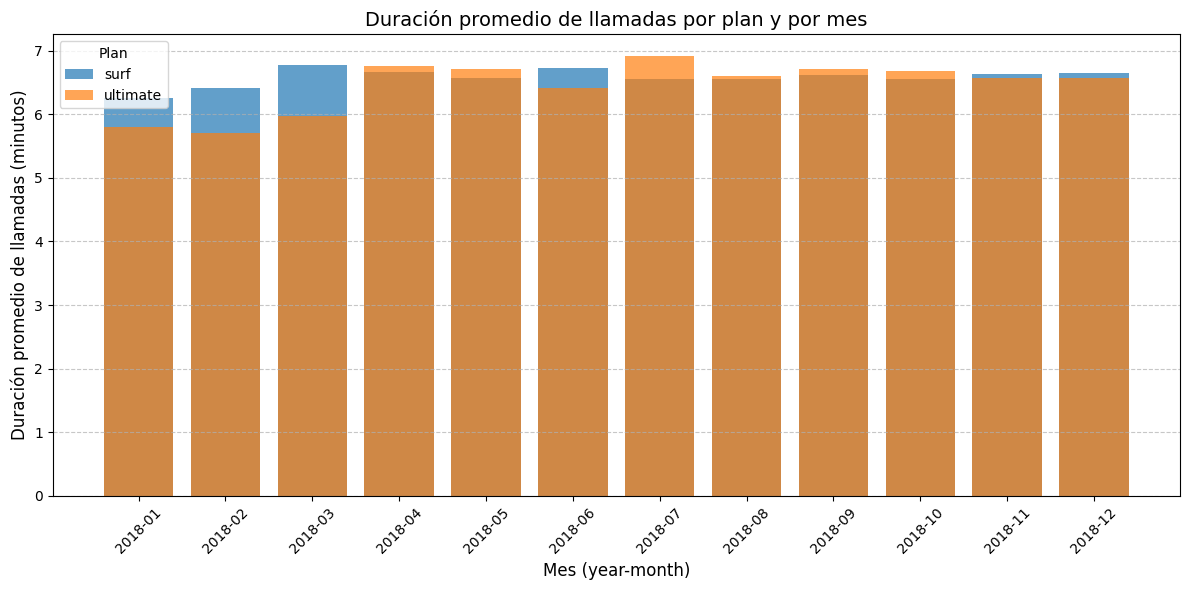

In [288]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
df_total['duracion_promedio_llamada'] = df_total['total_minutos_mes'] / df_total['numero_llamadas_mes']
df_total['duracion_promedio_llamada'] = df_total['duracion_promedio_llamada'].fillna(0)
#Agrupar por plan y year_month
df_promedio = df_total.groupby(['plan', 'year_month'])['duracion_promedio_llamada'].mean().reset_index()
#Datos para grafico de barras
plt.figure(figsize=(12, 6))
planes = df_promedio['plan'].unique()
colores = ['#1f77b4', '#ff7f0e']
for idx, plan in enumerate(planes):
    datos = df_promedio[df_promedio['plan'] == plan]
    plt.bar(
        datos['year_month'],
        datos['duracion_promedio_llamada'],
        label=plan,
        color=colores[idx],
        alpha=0.7)
plt.title('Duración promedio de llamadas por plan y por mes', fontsize=14)
plt.xlabel('Mes (year-month)', fontsize=12)
plt.ylabel('Duración promedio de llamadas (minutos)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

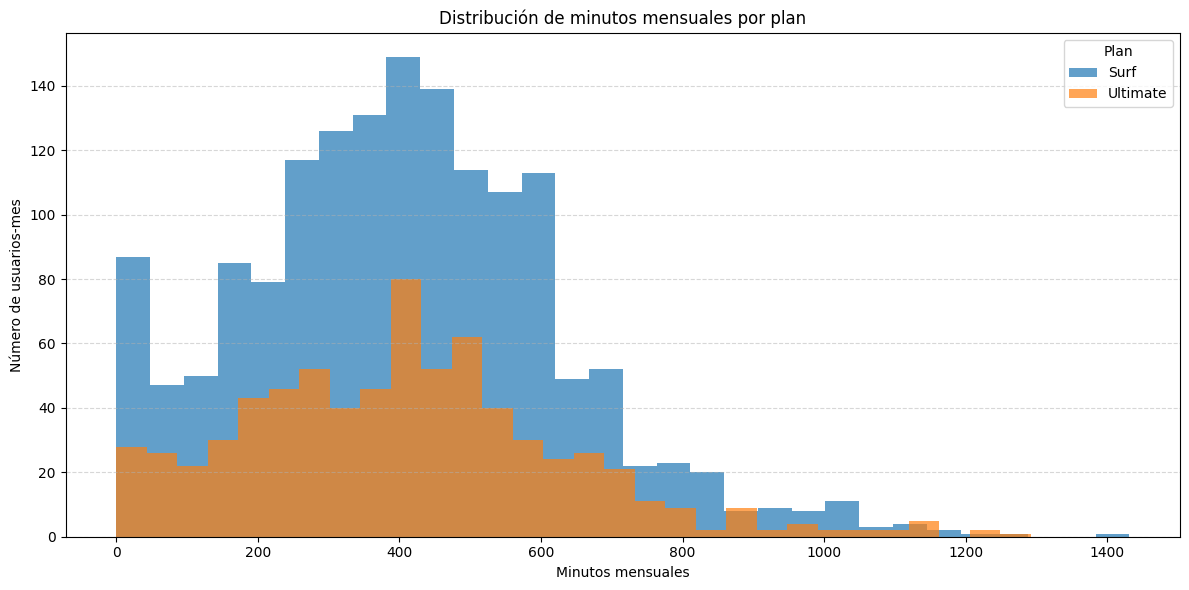

In [289]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
df_surf = df_total[df_total['plan'] == 'surf']
df_ultimate = df_total[df_total['plan'] == 'ultimate']
#Datos para elaborar el histograma
plt.figure(figsize=(12, 6))
plt.hist(df_surf['total_minutos_mes'], bins=30, alpha=0.7, label='Surf', color='#1f77b4')
plt.hist(df_ultimate['total_minutos_mes'], bins=30, alpha=0.7, label='Ultimate', color='#ff7f0e')
plt.title('Distribución de minutos mensuales por plan')
plt.xlabel('Minutos mensuales')
plt.ylabel('Número de usuarios-mes')
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [290]:
# Calcula la media y la varianza de la duración mensual de llamadas.
media_minutos = df_total['total_minutos_mes'].mean()
varianza_minutos = df_total['total_minutos_mes'].var()
print(f"Media de minutos mensuales: {media_minutos:.2f}")
print(f"Varianza de minutos mensuales: {varianza_minutos:.2f}")

Media de minutos mensuales: 405.61
Varianza de minutos mensuales: 49752.16


<Figure size 1000x600 with 0 Axes>

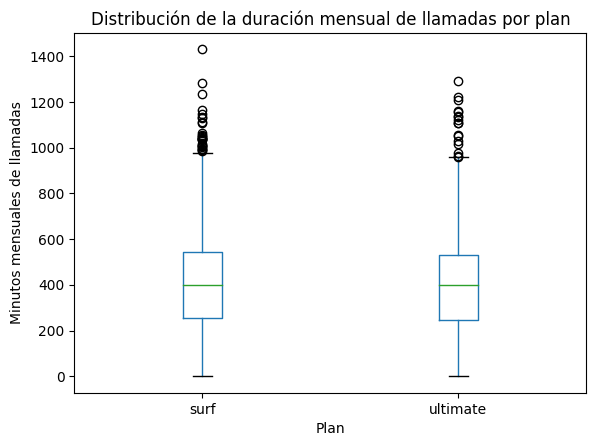

In [291]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(10, 6))
df_total.boxplot(column='total_minutos_mes', by='plan', grid=False)
plt.title('Distribución de la duración mensual de llamadas por plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('Minutos mensuales de llamadas')
plt.show()

De acuerdo a la visualizacion de la informacion observamos que la media esta alrededor de 406 minutos y que los datos son muy dispersos en los usuarios de acuerdo con el resultado de la varianza 49752.16, podriamos decir que para el plan surf es para clientes que no llaman tanto y al contrario el plan ulimate es para clientes que llaman demasiado. Tambien se podria concluir que hay usuarios que estan pagando por minutos que no usan y hay otros que usan mas del doble del promedio.

### Mensajes

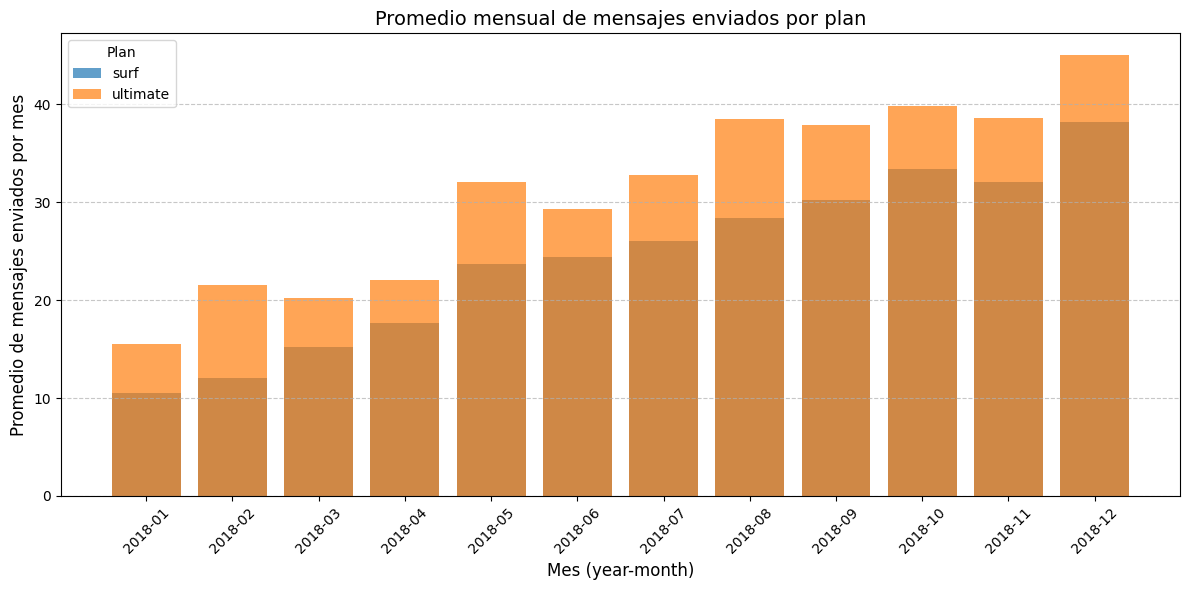

In [295]:
#Compara el promedio de mensajes por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
#Agrupar por plan y year_month para obtener el promedio general por mes y plan
df_promedio_mensajes = df_total.groupby(['plan', 'year_month'])['total_mensajes_mes'].mean().reset_index()
#Datos para gráfico de barras
plt.figure(figsize=(12, 6))
planes = df_promedio_mensajes['plan'].unique()
colores = ['#1f77b4', '#ff7f0e']
for idx, plan in enumerate(planes):
    datos = df_promedio_mensajes[df_promedio_mensajes['plan'] == plan]
    plt.bar(
        datos['year_month'],
        datos['total_mensajes_mes'],
        label=plan,
        color=colores[idx],
        alpha=0.7
    )

plt.title('Promedio mensual de mensajes enviados por plan', fontsize=14)
plt.xlabel('Mes (year-month)', fontsize=12)
plt.ylabel('Promedio de mensajes enviados por mes', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

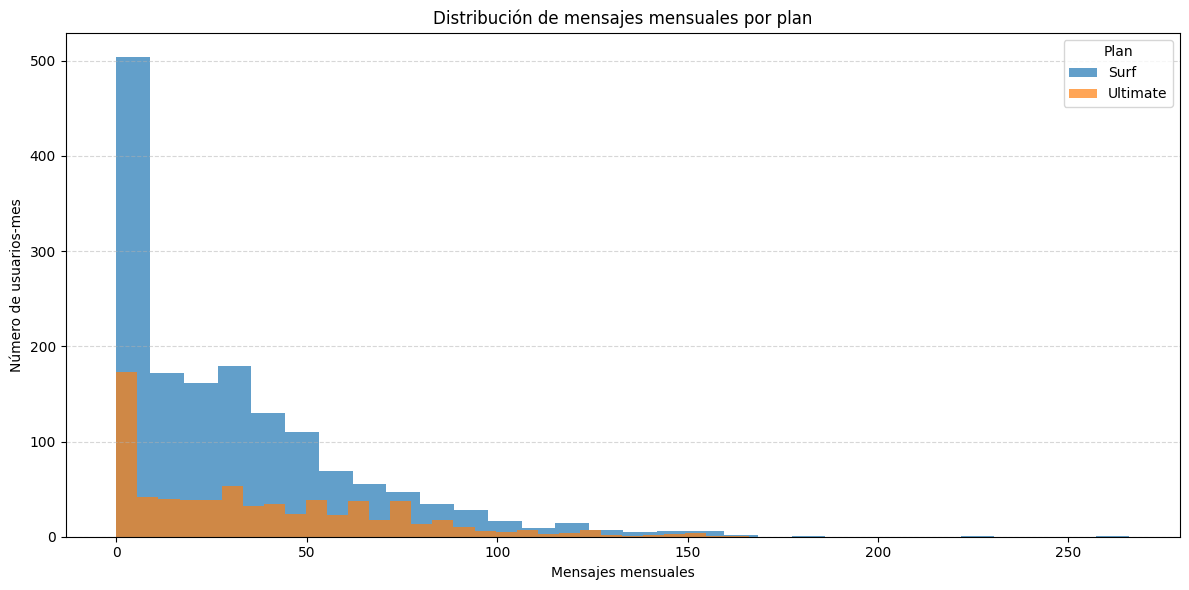

In [305]:
#Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.
df_surf = df_total[df_total['plan'] == 'surf']
df_ultimate = df_total[df_total['plan'] == 'ultimate']
#Datos para elaborar el histograma
plt.figure(figsize=(12, 6))
plt.hist(df_surf['total_mensajes_mes'], bins=30, alpha=0.7, label='Surf', color='#1f77b4')
plt.hist(df_ultimate['total_mensajes_mes'], bins=30, alpha=0.7, label='Ultimate', color='#ff7f0e')
plt.title('Distribución de mensajes mensuales por plan')
plt.xlabel('Mensajes mensuales')
plt.ylabel('Número de usuarios-mes')
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

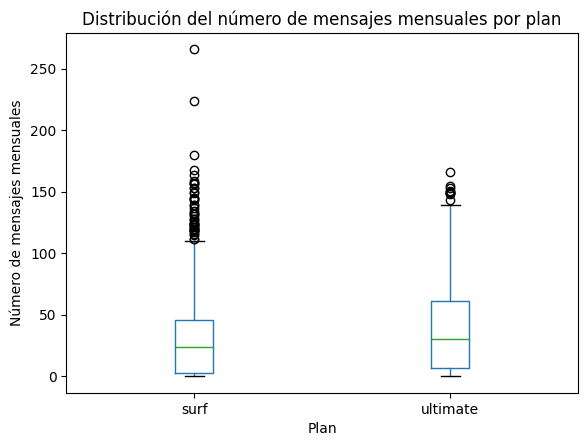

In [297]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
plt.figure(figsize=(10, 6))
df_total.boxplot(column='total_mensajes_mes', by='plan', grid=False)
plt.title('Distribución del número de mensajes mensuales por plan')
plt.suptitle('')  
plt.xlabel('Plan')
plt.ylabel('Número de mensajes mensuales')
plt.show()

In [300]:
# Calcula la media y la varianza de la número de mensajes que tienden a enviar cada mes.
media_mensajes = df_total['total_mensajes_mes'].mean()
varianza_mensajes = df_total['total_mensajes_mes'].var()
print(f"Media de mensajes mensuales: {media_mensajes:.2f}")
print(f"Varianza de mensajes mensuales: {varianza_mensajes:.2f}")

Media de mensajes mensuales: 32.90
Varianza de mensajes mensuales: 1127.85


Podemos concluir que igual que se presenta en el consumo de minutos en los planes, los usuarios estan muy dispersos en el comportamiento, algunos usuarios no envian mensajes, otros envian entre 70 o mas mensajes al mes y que el plan surf de 50 mensajes es casi suficiente para la mayoria de usuarios y el plan ultimate de 1000 son demasiados y lo usan muy pocos a ese nivel. Esto podría indicar que los planes deberían adaptarse mejor a diferentes perfiles: usuarios de bajo, medio y alto consumo de mensajes.

### Internet

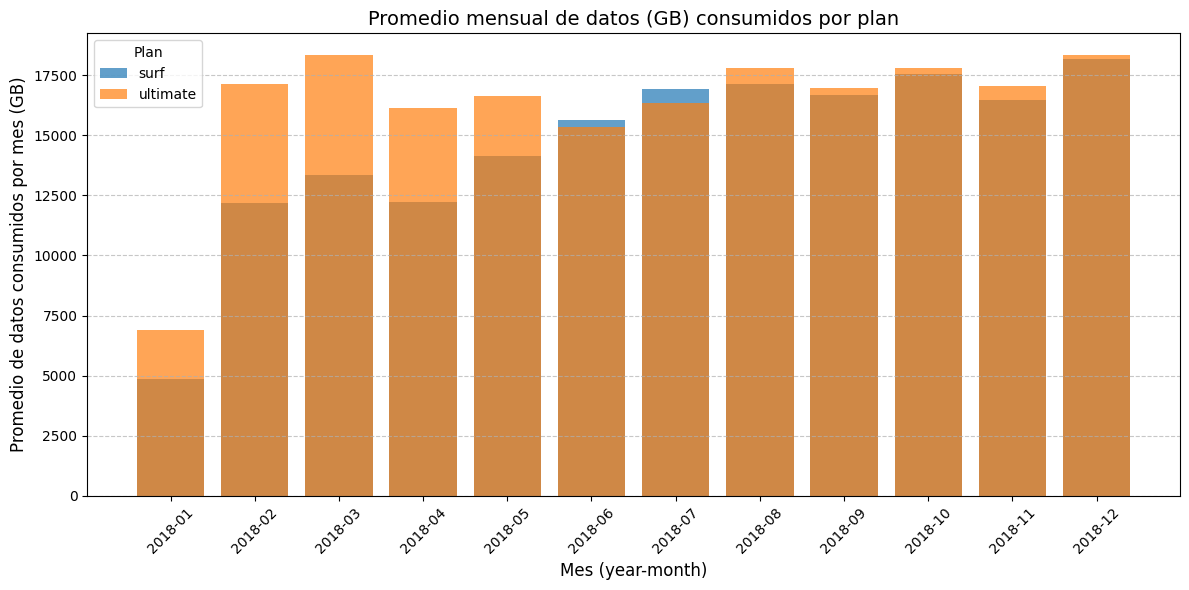

In [303]:
#Compara el promedio de datos por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
#Agrupar por plan y year_month para obtener el promedio general por mes y plan
df_promedio_datos = df_total.groupby(['plan', 'year_month'])['total_mb_mes'].mean().reset_index()
#Datos para gráfico de barras
plt.figure(figsize=(12, 6))
planes = df_promedio_datos['plan'].unique()
colores = ['#1f77b4', '#ff7f0e']  # colores para cada plan

for idx, plan in enumerate(planes):
    datos = df_promedio_datos[df_promedio_datos['plan'] == plan]
    plt.bar(
        datos['year_month'],
        datos['total_mb_mes'],
        label=plan,
        color=colores[idx],
        alpha=0.7
    )

plt.title('Promedio mensual de datos (GB) consumidos por plan', fontsize=14)
plt.xlabel('Mes (year-month)', fontsize=12)
plt.ylabel('Promedio de datos consumidos por mes (GB)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

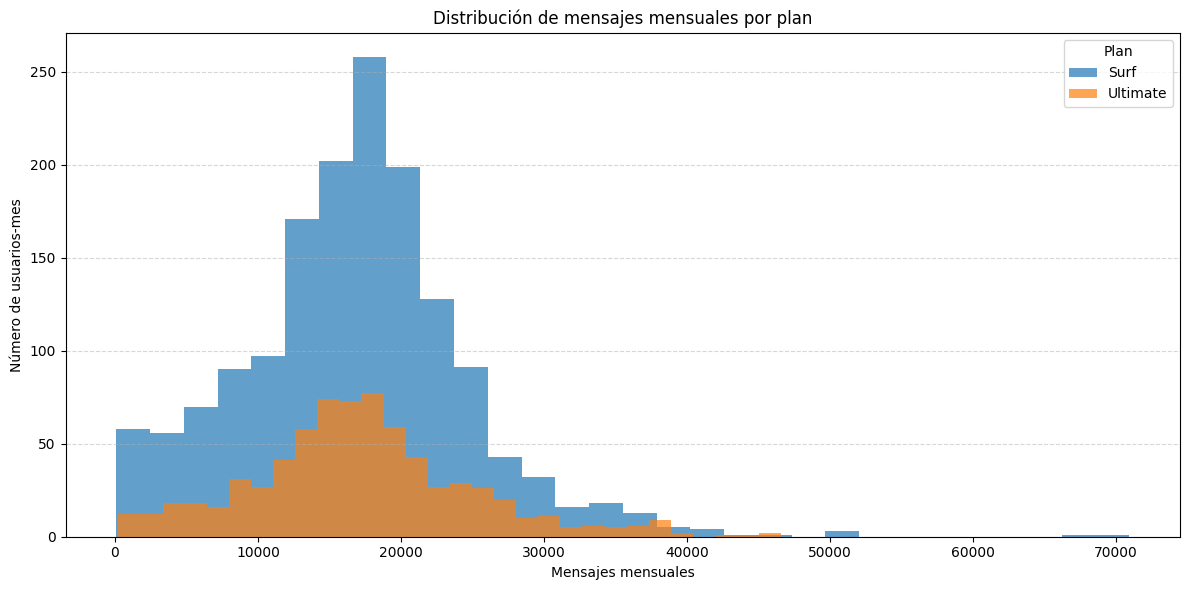

In [306]:
#Compara el número de datos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
df_surf = df_total[df_total['plan'] == 'surf']
df_ultimate = df_total[df_total['plan'] == 'ultimate']
#Datos para elaborar el histograma
plt.figure(figsize=(12, 6))
plt.hist(df_surf['total_mb_mes'], bins=30, alpha=0.7, label='Surf', color='#1f77b4')
plt.hist(df_ultimate['total_mb_mes'], bins=30, alpha=0.7, label='Ultimate', color='#ff7f0e')
plt.title('Distribución de mensajes mensuales por plan')
plt.xlabel('Mensajes mensuales')
plt.ylabel('Número de usuarios-mes')
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

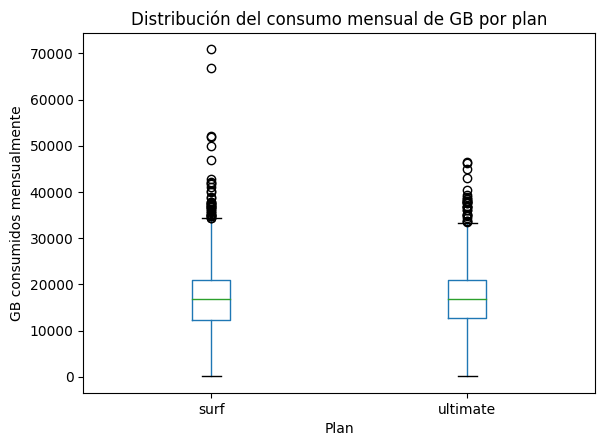

In [307]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
plt.figure(figsize=(10, 6))
df_total.boxplot(column='total_mb_mes', by='plan', grid=False)
plt.title('Distribución del consumo mensual de GB por plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('GB consumidos mensualmente')
plt.show()

In [308]:
# Calcula la media y la varianza de los gb que usan cada mes.
media_gb = df_total['total_mb_mes'].mean()
varianza_gb = df_total['total_mb_mes'].var()
print(f"Media de datos mensuales: {media_gb:.2f}")
print(f"Varianza de datos mensuales: {varianza_gb:.2f}")

Media de datos mensuales: 16882.20
Varianza de datos mensuales: 61933513.55


Como conclusion es que los usuarios consumen en promedio 16 gigas para los planes surf estaria por encima de la gigas que incluye el plan y estarian pagando cargos extras por ese consumo adicional y para el plan ultimate esta por debajo de lo que ofrece el plan por lo tanto no estarian pagando cargos extras. 

## Ingreso

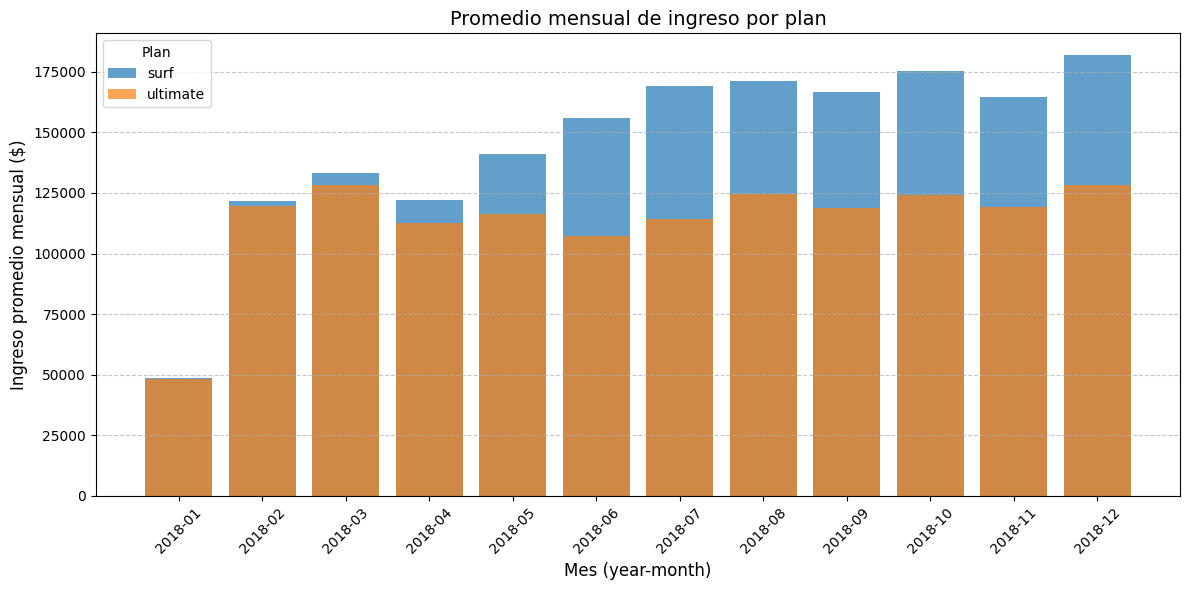

In [309]:
#Compara el promedio de ingreso por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
#Agrupar por plan y year_month para obtener el promedio general por mes y plan
df_promedio_ingreso = df_total.groupby(['plan', 'year_month'])['ingreso_total_mes'].mean().reset_index()
#Datos para gráfico de barras
plt.figure(figsize=(12, 6))
planes = df_promedio_ingreso['plan'].unique()
colores = ['#1f77b4', '#ff7f0e']

for idx, plan in enumerate(planes):
    datos = df_promedio_ingreso[df_promedio_ingreso['plan'] == plan]
    plt.bar(
        datos['year_month'],
        datos['ingreso_total_mes'],
        label=plan,
        color=colores[idx],
        alpha=0.7
    )

plt.title('Promedio mensual de ingreso por plan', fontsize=14)
plt.xlabel('Mes (year-month)', fontsize=12)
plt.ylabel('Ingreso promedio mensual ($)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

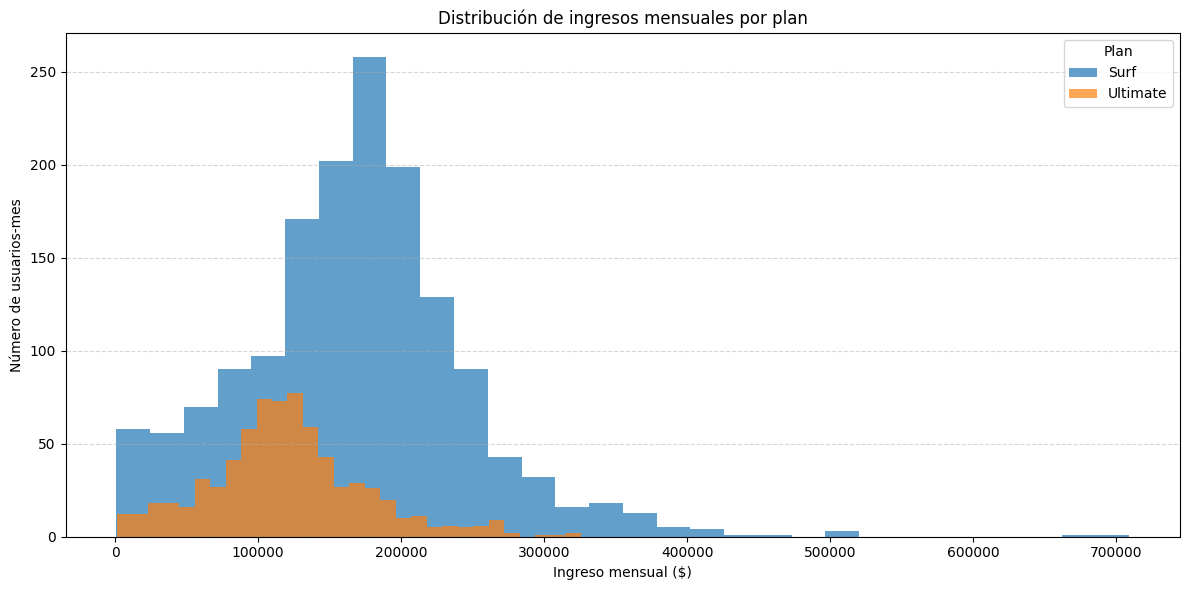

In [312]:
#Compara el número de ingresos mensuales por cada plan. Traza un histograma.
df_surf = df_total[df_total['plan'] == 'surf']
df_ultimate = df_total[df_total['plan'] == 'ultimate']
#Datos para elaborar el histograma
plt.figure(figsize=(12, 6))
plt.hist(df_surf['ingreso_total_mes'], bins=30, alpha=0.7, label='Surf', color='#1f77b4')
plt.hist(df_ultimate['ingreso_total_mes'], bins=30, alpha=0.7, label='Ultimate', color='#ff7f0e')
plt.title('Distribución de ingresos mensuales por plan')
plt.xlabel('Ingreso mensual ($)')
plt.ylabel('Número de usuarios-mes')
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

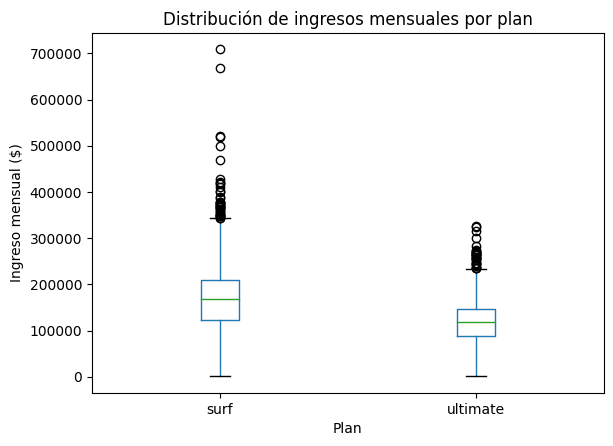

In [314]:
# Compara la cantidad de ingresos por usuarios por plan
plt.figure(figsize=(10, 6))
df_total.boxplot(column='ingreso_total_mes', by='plan', grid=False)
plt.title('Distribución de ingresos mensuales por plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('Ingreso mensual ($)')
plt.show()

In [315]:
# Calcula la media y la varianza de los gb que usan cada mes.
media_ingreso = df_total['ingreso_total_mes'].mean()
varianza_ingreso = df_total['ingreso_total_mes'].var()
print(f"Media de ingresos mensuales: ${media_ingreso:.2f}")
print(f"Varianza de ingresos mensuales: ${varianza_ingreso:.2f}")

Media de ingresos mensuales: $152359.81
Varianza de ingresos mensuales: $5668668522.09


In [316]:
df_total['ingreso_total_mes'].describe().round(2)

count      2277.00
mean     152359.81
std       75290.56
min         793.10
25%      103818.19
50%      148053.20
75%      196204.80
max      709204.53
Name: ingreso_total_mes, dtype: float64

Un usuario promedio está generando aproximadamente $152,360 mensuales en ingresos. Esto sugiere que los planes ofrecen un buen margen económico para la empresa, al menos en promedio. Una varianza tan grande respecto a la media indica que los ingresos de los usuarios no son homogéneos. Aunque el promedio de ingresos por usuario es alto, los datos muestran una dispersión muy significativa. Esto sugiere que los ingresos están altamente concentrados en algunos usuarios con consumos excepcionales, mientras que la mayoría podría estar generando ingresos más bajos. El mínimo es muy bajo ($793), mientras que el máximo es altísimo ($709,204).

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

La estructura de análisis (visualizaciones y cálculo de valores estadísticos) que empleaste para los datos de **llamadas** está muy bien. Debes usar la misma estructura de análisis para los demás conjuntos de datos: **mensajes, internet e ingresos**, con el fin de lograr hacer una comparación detallada del comportamiento de los usuarios de cada plan.

Respecto a la información sobre **Ingresos**, seguramente los datos que obtuviste cambiarán cuando hagas el ajuste en el cálculo de los cobros mensuales por usuario en cada plan, entonces vale la pena revisar si tu análisis deba ser ajustado también.

</div>

## Prueba las hipótesis estadísticas

In [318]:
# Prueba las hipótesis
from scipy.stats import ttest_ind
surf_ingresos = df_total[df_total['plan'] == 'surf']['ingreso_total_mes']
ultimate_ingresos = df_total[df_total['plan'] == 'ultimate']['ingreso_total_mes']
alpha = 0.05
t_stat, p_value = ttest_ind(surf_ingresos, ultimate_ingresos, equal_var=False)
print('Estadístico t:', t_stat)
print('Valor p:', p_value)

Estadístico t: 16.275019228958712
Valor p: 6.546565678908824e-56


In [319]:
# Prueba las hipótesis usuarios del área NY-NJ es diferente al de los usuarios de otras regiones
df_total = df_total.merge(df_users[['user_id', 'estado']], on='user_id', how='left')
ny_nj_ingresos = df_total[df_total['estado'].isin(['NY', 'NJ'])]['ingreso_total_mes']
otras_regiones_ingresos = df_total[~df_total['estado'].isin(['NY', 'NJ'])]['ingreso_total_mes']
t_stat, p_value = ttest_ind(ny_nj_ingresos, otras_regiones_ingresos, equal_var=False)
print('Estadístico t:', round(t_stat, 2))
print('Valor p:', round(p_value, 4))
alpha = 0.05
if p_value < alpha:
    print('Rechazamos H₀: hay diferencia significativa entre los ingresos promedio de NY-NJ y otras regiones.')
else:
    print('No se puede rechazar H₀: no hay evidencia de diferencia entre los ingresos promedio.')

Estadístico t: 2.48
Valor p: 0.0135
Rechazamos H₀: hay diferencia significativa entre los ingresos promedio de NY-NJ y otras regiones.


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Luz no estás obteniendo los resultaddos esperados, ya que estás filtrando usando la columna *total_costo* la cual solo tiene 2 valores, realmente debes usar la columnna *ingreso_total_mes* que corresponde al cobro mensual para cada usuario

</div>

## Conclusión general

1. Es importante inicial el analisis de la informacion con el contenido de los datos, asi mismo evidenciar si hay valores ausentes o duplicados que requieran de ajuste o eliminacion para que no distorsione los resultados de los calculos estimados.
2. Como no fue posible determinar como esta distribuido el costo de los paquetes de los planes si fue posible identificar los sobrecostos que los usuarios podrian estar asumiendo por desborde del plan.
3. Dentro del plan Surf se evidencia que generan mas ingresos pero hay usuarios que sobrepasan el plan y deben asumir extracargos.
4.El plan Surf representa una mayor fuente de ingresos para la empresa debido al cobro por consumos adicionales. Sin embargo estos estos ingresos son menos estables y dependen del comportamiento de los usuarios que puede variar de un mes a otro.
5. El operador Megaline puede invertir en publicidad al plan Surf que es el que genera mas ingresos por lo que la mayoria de usuarios tienen dicho plan.
6. El operador puede tambien estimar aumentar los datos o minutos por plan ya que son los recursos que mas usan los clientes. Los mensajes actualmente no son de mayor uso y se evidencio en el analisis realizado.    

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Tu conclusión va alineada con la información que has obtenido en el proyecto. Aunque presentas una interpretación correcta, es importante revisar tu conclusión luego de hacer los ajustes que te mencioné más arriba, en en caso de que los valores hayan cambiado significativamente.

</div>